# Global params

In [1]:
src_directory = '/Users/rwilliams/Desktop/colbert/src'
dest_directory = '/Users/rwilliams/Desktop/colbert/dest'

# Imports and helper functions

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import skimage.exposure
from skimage.transform import resize
from skimage.util import crop
import os
%matplotlib inline

def resize_crop(img):
    crops = ((25, 439), (512, 512), (0, 0))
    cropped = crop(img, crops)
    processed = resize(cropped, (128, 128))
    processed = skimage.exposure.equalize_adapthist(processed)
    return processed

def load_img(id):
    filename = 'out%s.png' % id
    path = os.path.join(src_directory, filename)
    return sp.ndimage.imread(path)

def save_img(img, id):
    filename = '%06d.jpg' % id
    path = os.path.join(dest_directory, filename)
    sp.misc.imsave(path, img)

In [101]:
for i in range(7573):
    img = load_img(i+1)
    transf = resize_crop(img)
    save_img(transf, i+1)

/Users/rwilliams/anaconda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/rwilliams/anaconda/envs/keras/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/Users/rwilliams/anaconda/envs/keras/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)


# Load training data

In [3]:
training = np.array([resize_crop(load_img(i+1, img_directory), (img_size, img_size)) for i in range(training_set_size)])

/home/ec2-user/.conda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


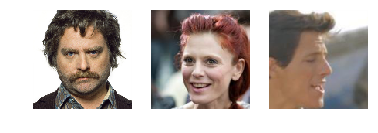

In [4]:
imshow([training[i] for i in range(3)])

# Create model and load weights

In [14]:
from model import Vaegan
from keras.optimizers import Adam

model = Vaegan(img_shape=(img_size, img_size, 3), batch_size=batch_size)
model.model.compile(Adam(lr=.00003), 'binary_crossentropy')

In [7]:
if (False):
    model.model.load_weights(model_weights_path)

# Zach and latest output of Zach

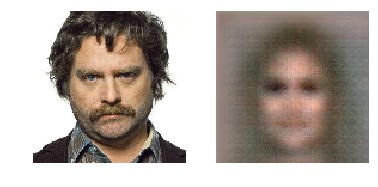

In [8]:
onlyfiles = [f for f in os.listdir(img_save_directory) if os.path.isfile(os.path.join(img_save_directory, f))]
if (len(onlyfiles) > 0):
    latest = max(onlyfiles)
    imshow([training[0], sp.ndimage.imread(os.path.join(img_save_directory, latest))])

# Train

Reset image save filename counter

In [15]:
save_idx = 0

In [ ]:
# save an image of prediction before training
predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
path = os.path.join(img_save_directory, '%04d.jpg' % save_idx)
sp.misc.imsave(path, predictions[0])
save_idx += 1

start = save_idx
stop = save_idx + 100

for i in range(start, stop):
    model.model.fit(x=training, y=training, epochs=1, batch_size=batch_size, verbose=True)
    predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
    path = os.path.join(img_save_directory, '%04d.jpg' % i)
    sp.misc.imsave(path, predictions[0])
    model.model.save_weights(model_weights_path)
    save_idx = i

Epoch 1/1
2624/4096 [==================>...........] - ETA: 10s - loss: 24.9393

In [ ]:
predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
predictions.shape
predictions[0]
# np.argwhere(np.isnan(predictions))